In [20]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math

from PIL import Image, ImageDraw

## Mandelbrot

s is a sample (pixel/point of plot). i is number of iterations before stating that does not go to infinity, and therefore does not lie within the mandelbrot set. 

Investigates what happens when s and i increase separetly. 

In [2]:
c = complex(2,2)
Z0 = c
Z = Z0

def amount_iter(compl, max_steps, threshold_inf: int = 10):
    c = compl
    z = c
    i = 1
    while (z*z.conjugate()).real < threshold_inf and i < max_steps:
        z = z**2 + c
        i += 1
    return i

1

## Plotting the MandelBrot set

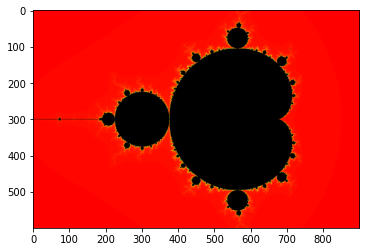

In [137]:
max_steps = 1000 # this is equal to i

# Image size (pixels), this is equal to the amount of samples s
X_WIDTH = 900
Y_HEIGHT = 600

# Plot window
real_minus = -2
real_max = 1
real_dif = real_max - real_minus
imag_minus = -1
imag_max = 1
imag_dif = imag_max - imag_minus

im = Image.new('HSV', (X_WIDTH, Y_HEIGHT), (0, 0, 0))
draw = ImageDraw.Draw(im)
percentage = 0


for pix_x in range(0, X_WIDTH):
    for pix_y in range(0, Y_HEIGHT):
        # Convert pixel coordinate to complex number
        c = complex(real_minus + (pix_x / X_WIDTH) * real_dif,
                    imag_minus + (pix_y / Y_HEIGHT) * imag_dif)
        # Compute the number of iterations
        m = amount_iter(c, max_steps)
        # The color depends on the number of iterations
        hue = int(255 * m / max_steps)
        saturation = 255
        if m < max_steps:
            value = 255 
        else:
            value = 0
        # Plot the point
        draw.point([pix_x, pix_y], (hue, saturation, value))
#     if percentage != str(round(pix_x/X_WIDTH,2)):
#         percentage = str(round(pix_x/X_WIDTH,2))
#         print("Percentage: " + percentage + "%")
        
im.convert('RGB').save('output.png', 'PNG')

imgplot = plt.imshow(im.convert('RGB'))

## Monte Carlo

In [106]:
def xy_rand():
    x = np.random.random_sample()
    y = np.random.random_sample()
    if x < 0.5:
        x = -2*np.random.random_sample()        # minimum value of x is -2
    else:
        x = 1*np.random.random_sample()         # maximum value of x is 1
    if y < 0.5:
        y = -1*np.random.random_sample()        # minimum value of x is -1
    else:
        y = 1*np.random.random_sample()         # maximum value of x is 1
    return x,y 

1.478142
0.30195480546025516


In [133]:
## Change the amount of i (iterations) before stating that the point does not go to infinity
t = 0
samples = [100, 200, 500, 1000]
listA = [[],[],[],[]]
max_steps = 1000 # this is equal to i
maxmax_steps = 1000

for value in range(len(samples)):
    print("Amount of samples: " + str(samples[value]))
    for max_steps in range(maxmax_steps):
        t = 0
        f = 0
        for s in range(samples[value]):
            x, y = xy_rand()
            m = amount_iter(complex(x,y), max_steps)
            if m == max_steps:
                t += 1
    #     print(t/it*6)
        listA[value].append(t/samples[value]*6)

        
for i in range(len(listA)):
    print(statistics.mean(listA[i]))
    print(statistics.stdev(listA[i]))

Amount of samples: 100
Amount of samples: 200
Amount of samples: 500
Amount of samples: 1000
1.4706000000000001
0.3855493331446551
1.47534
0.3422900040124556
1.4802
0.31552170439756744
1.473822
0.3027536822370755


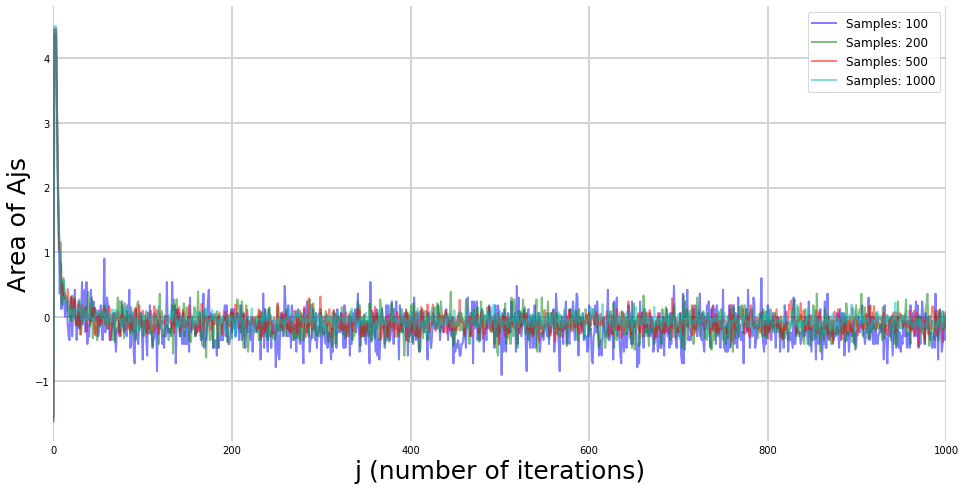

In [136]:
listAdif = [[],[],[],[]]
for value in range(len(samples)):
    for x in range(len(listA[value])):
        listAdif[value].append(listA[value][x])
    for i in range(len(listAdif[value])):
        listAdif[value][i] -= listAdif[value][len(listAdif[value])-1]

colors = ['b', 'g', 'r', 'c']
        
        
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot(111, axisbelow=True)
# ax.plot(range(maxmax_steps), listA, 'r', alpha=0.5, lw=2, label='Area(j)')
for value in range(len(samples)):
    ax.plot(range(maxmax_steps), listAdif[value], color = colors[value], alpha=0.5, lw=2, label= "Samples: " + str(samples[value]))
ax.set_xlabel('j (number of iterations)', size = 25)
ax.set_ylabel('Area of Ajs', size = 25)
# ax.set_ylim(-1,1)
ax.set_xlim(0,maxmax_steps)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='lightgray', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.legend(fontsize="large")
# plt.hlines(1.506484, 0, maxmax_steps)
plt.show()